In [2]:
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.ticker import MultipleLocator
import numpy as np  # Original numpy

from enum import Enum

In [3]:
dictionary = {
    'data_0' : 'result_[0]_n.npy',
    'data_0.005' : 'result_[0.005]_n.npy',
    'data_0.05' : 'result_[0.05]_n.npy',
    'data_0.1' : 'result_[0.1]_n.npy',
    'data_0.5' : 'result_[0.5]_neww.npy'
}

data = {}

for key, file_name in dictionary.items():
    data[key] = np.load(file_name)

In [4]:
for i in data.items():
    print(i[1][0])

[[ 9.99999978e-03  1.01199799e+01  1.13001613e-06 ...  1.58278680e+00
   5.18827105e+00  4.71238708e+00]
 [ 1.99999996e-02  1.01208210e+01  8.10233132e-07 ...  1.58936656e+00
   5.20851040e+00  4.71238899e+00]
 [ 2.99999993e-02  1.01208286e+01 -2.23292091e-07 ...  1.59903574e+00
   5.20930099e+00  4.71238804e+00]
 ...
 [ 6.25999975e+00  1.01208448e+01 -1.17582385e-05 ...  7.82947397e+00
   5.20928001e+00  4.71238422e+00]
 [ 6.26999998e+00  1.01208448e+01  6.23345750e-06 ...  7.83939314e+00
   5.20924234e+00  4.71239614e+00]
 [ 6.27999973e+00  1.01208439e+01 -7.43342707e-06 ...  7.84932566e+00
   5.20925140e+00  4.71238995e+00]]
[[ 9.99999978e-03  8.02338028e+00 -1.26377745e-05 ...  8.88297796e-01
   7.10784972e-01  1.57080495e+00]
 [ 1.99999996e-02  8.02645016e+00 -2.82433143e-06 ...  9.03926194e-01
   6.99847698e-01  1.57079768e+00]
 [ 2.99999993e-02  8.02647305e+00  3.19462679e-08 ...  9.14224267e-01
   6.99204743e-01  1.57079673e+00]
 ...
 [ 6.25999975e+00  8.02647400e+00 -5.0353810

In [5]:
# [3-qubit]
class INDEX(Enum):
    PHI = 0
    CFI = 1
    
    THETA_X = 2
    
    PHI_Z1 = 3
    PHI_Z2 = 4
    PHI_Z3 = 5
    
    TAU_1 = 6
    TAU_2 = 7

In [6]:
class DataPlotter:
    def __init__(self, data_in):
        self.data_in = data_in
        
    def plot_cfi(self, tau_dephase = 0, gamma_ps = 0):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.CFI.value],
            label = f'$\\tau$ = {tau_dephase}'
        )
        plt.title(f'CFI at $\gamma_{{ps}} = {gamma_ps}$')
        plt.xlabel('Time')
        plt.ylabel('CFI')
        plt.grid()
        plt.legend()
        
    def plot_theta_x(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.THETA_X.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\theta_{{x}}$',
            ylim = set_ylim
        )
        
    def plot_phi_z1(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.PHI_Z1.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\phi_{{z1}}$',
            ylim = set_ylim
        )
        
    def plot_phi_z2(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.PHI_Z2.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\phi_{{z2}}$',
            ylim = set_ylim
        )
        
    def plot_phi_z3(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.PHI_Z3.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\phi_{{z3}}$',
            ylim = set_ylim
        )
        
    def plot_tau_1(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.TAU_1.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\tau_{{1}}$',
            ylim = set_ylim
        )
        
    def plot_tau_2(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.TAU_2.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\tau_{{2}}$',
            ylim = set_ylim
        )
        
    def plot_setting(self, title, xlabel='Time', ylabel='Rad', ylim =(-2*np.pi, 2*np.pi)):
        plt.yticks(
            [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, (3*np.pi)/2, 2*np.pi, 5*np.pi/2], 
            ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$', '$3\pi/2$', '$2\pi$', '$5\pi/2$']
        )
        plt.ylim(ylim)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid()
        plt.legend()

In [19]:
data['data_0.5'][0][10:20, INDEX.CFI.value]

array([0.36722824, 0.36722818, 0.36722827, 0.36722812, 0.36722824,
       0.36722818, 0.36722821, 0.36722827, 0.36722821, 0.36722818])

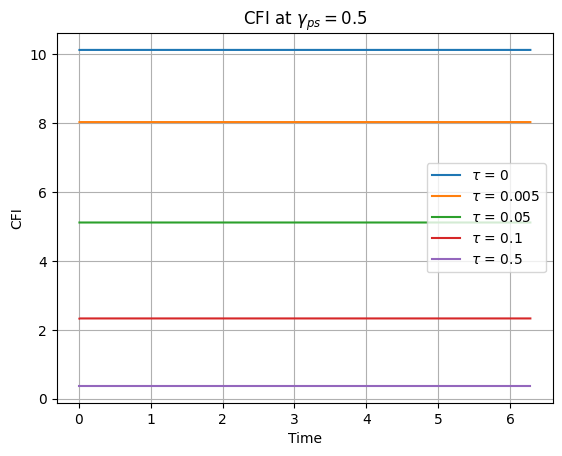

In [8]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_cfi(tau_dephase = current_tau, gamma_ps=0.5)

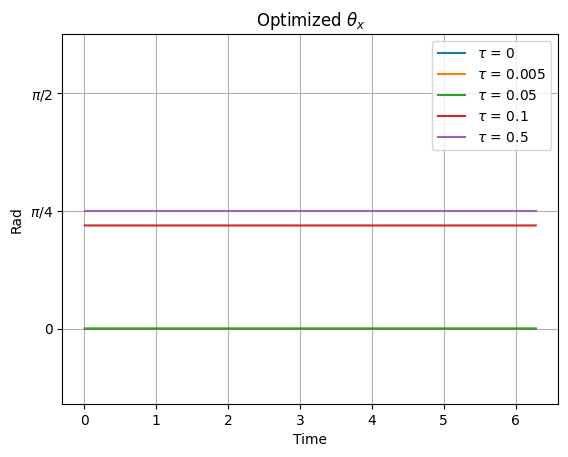

In [9]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_theta_x(tau_dephase=current_tau, set_ylim=(-0.5, 5*np.pi/8))

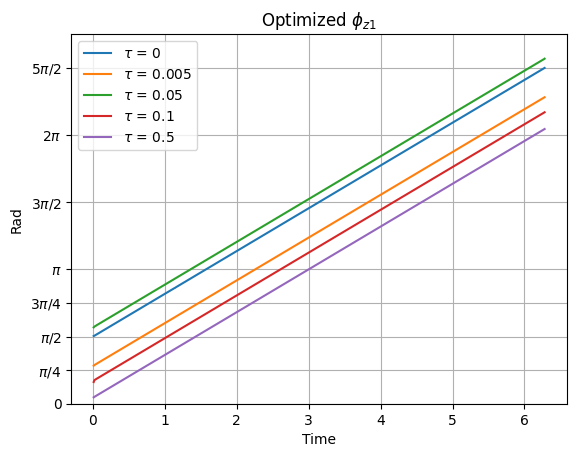

In [10]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_phi_z1(tau_dephase=current_tau, set_ylim=(0, 5.5*np.pi/2))

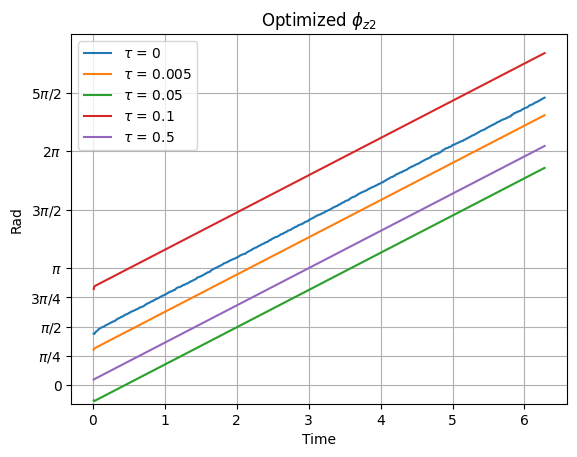

In [11]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_phi_z2(tau_dephase=current_tau, set_ylim=(-0.5, 6*np.pi/2))

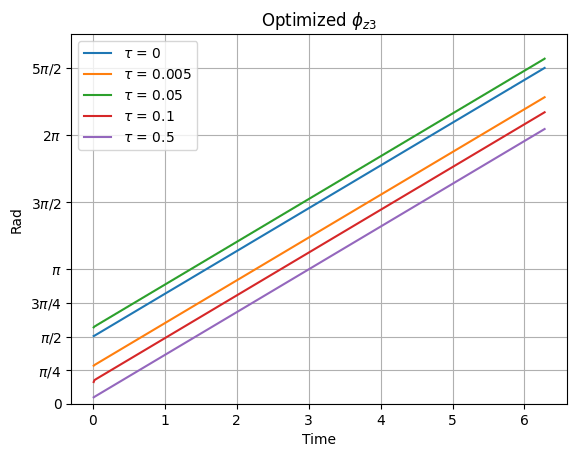

In [12]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_phi_z3(tau_dephase=current_tau, set_ylim=(0, 5.5*np.pi/2))

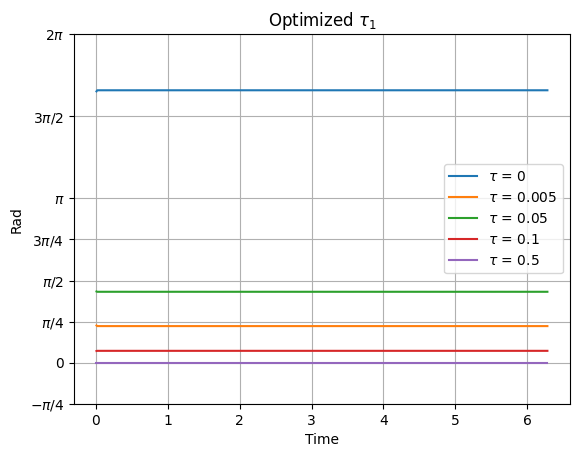

In [13]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_tau_1(tau_dephase=current_tau, set_ylim=(-1*np.pi/4, 2*np.pi))

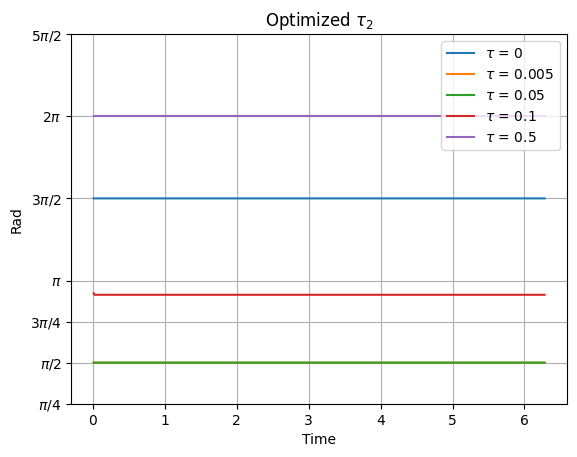

In [14]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_tau_2(tau_dephase=current_tau, set_ylim=(np.pi/4, 5*np.pi/2))